# Exploratory data analytics on titanic dataset using jupyter - J K Vishwajeet

## ---------------------Analysis of the Titanic dataset provided by Kaggle. 🚢---------------------

Importing required libraries for plotting and analysis


In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Titanic dataset using Pandas read_csv method and explore first 10 rows of the dataset

In [15]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Data Description:

Statistical summary of the imported dataset using pandas.describe() 

In [12]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Information on datatypes in the dataset using pandas.info()

In [17]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Data Cleanup:

Omiting the rows with missing ‘Ages’ and ‘Embarked’ 

In [20]:
titanic_cleaned = titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
titanic_cleaned.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


Statistical summary of the cleaned dataset using pandas.describe() 

In [26]:
titanic_cleaned.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data Analysis:


#### To find how Survival is correlated to other attributes of the dataset

In [16]:
titanic_cleaned.corr(method='pearson')

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


From above correlation table, it is observed that Survival is inversly correlated to Pclass value. In our case since Class 1 has lower numerical value, it had better survival rate compared to other classes. Also, Age and Survival seem to be correlated.

#### To find if Sex play a role in Survival 

Text(0.5, 1.0, 'Passengers who survived')

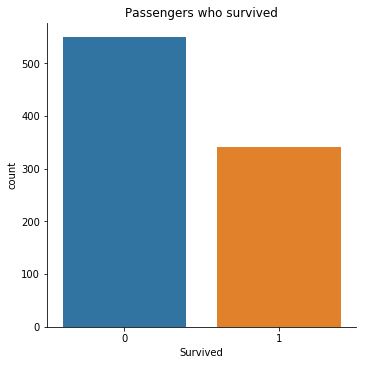

In [28]:
#titanic_cleaned.groupby(['Survived']).hist()
sns.catplot('Survived', data=titanic_df, kind='count')
plt.title("Passengers who survived")

Text(0.5, 1.0, 'Agewise distribution of the passenger aboard the Titanic')

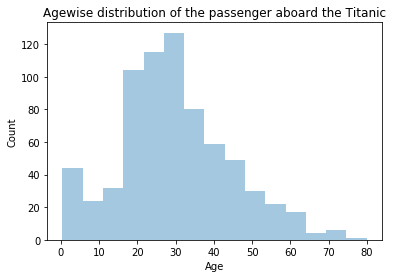

In [33]:
#Agewise distribution of the passenger aboard the Titanic
sns.distplot(titanic_cleaned['Age'].dropna(), bins=15, kde=False)
plt.ylabel('Count')
plt.title('Agewise distribution of the passenger aboard the Titanic')

From the above histogram, most of the passengers are of age 15 to 35

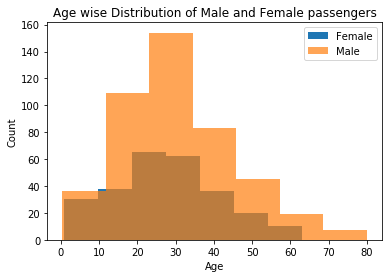

In [31]:
#Age wise Distribution of Male and Female passengers
plt.hist(titanic_cleaned['Age'][(titanic_cleaned['Sex'] == 'female')].dropna(), bins=7, label='Female', histtype='stepfilled')
plt.hist(titanic_cleaned['Age'][(titanic_cleaned['Sex'] == 'male')].dropna(), bins=7, label='Male', alpha=.7, histtype='stepfilled')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age wise Distribution of Male and Female passengers')
plt.legend()

There were many male passengers aboared compared to female passengers.

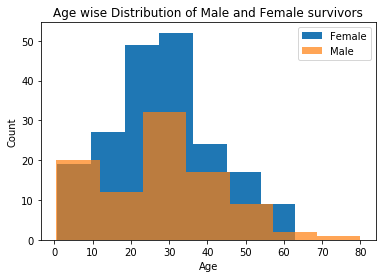

In [33]:
#Age wise Distribution of Male and Female survivors
plt.hist(titanic_cleaned['Age'][(titanic_cleaned['Sex'] == 'female') & (titanic_cleaned['Survived'] == 1)].dropna(), bins=7, label='Female', histtype='stepfilled')
plt.hist(titanic_cleaned['Age'][(titanic_cleaned['Sex'] == 'male') & (titanic_cleaned['Survived'] == 1)].dropna(), bins=7, label='Male', alpha=.7, histtype='stepfilled')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age wise Distribution of Male and Female survivors')
plt.legend()

The above histogram tells that women had better survival chance than men

In [38]:
yougest_survive = titanic_cleaned['Age'][(titanic_cleaned['Survived'] == 1)].min()
youngest_die = titanic_cleaned['Age'][(titanic_cleaned['Survived'] == 0)].min()
oldest_survive = titanic_cleaned['Age'][(titanic_cleaned['Survived'] == 1)].max()
oldest_die = titanic_cleaned['Age'][(titanic_cleaned['Survived'] == 0)].max()

print("Yougest to survive: {} \nYoungest to die: {} \nOldest to survive: {} \nOldest to die: {}".format(yougest_survive, youngest_die, oldest_survive, oldest_die))

Yougest to survive: 0.42 
Youngest to die: 1.0 
Oldest to survive: 80.0 
Oldest to die: 74.0


#### To check if class played role in survival

In [36]:
grouped_by_pclass = titanic_cleaned.groupby(['Pclass', 'Survived', 'Sex'])
grouped_by_pclass.size()

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64

In [40]:
titanic_cleaned.groupby(['Pclass', 'Sex']).describe()

Age                                                         \
               count       mean        std   min     25%   50%    75%   max   
Pclass Sex                                                                    
1      female   85.0  34.611765  13.612052  2.00  23.000  35.0  44.00  63.0   
       male    101.0  41.281386  15.139570  0.92  30.000  40.0  51.00  80.0   
2      female   74.0  28.722973  12.872702  2.00  22.250  28.0  36.00  57.0   
       male     99.0  30.740707  14.793894  0.67  23.000  30.0  36.75  70.0   
3      female  102.0  21.750000  12.729964  0.75  14.125  21.5  29.75  63.0   
       male    253.0  26.507589  12.159514  0.42  20.000  25.0  33.00  74.0   

                Fare             ...  SibSp      Survived                      \
               count        mean ...    75%  max    count      mean       std   
Pclass Sex                       ...                                            
1      female   94.0  106.125798 ...    1.0  3.0     94.0  0.968085  0.176716   
       male    122.0   67.226127 ...    1.0  3.0    122.0  0.368852  0.484484   
2      female   76.0   21.970121 ...    1.0  3.0     76.0  0.921053  0.271448   
       male    108.0   19.741782 ...    1.0  2.0    108.0  0.157407  0.365882   
3      female  144.0   16.118810 ...    1.0  8.0    144.0  0.500000  0.501745   
       male    347.0   12.661633 ...    0.0  8.0    347.0  0.135447  0.342694   

                                        
               min  25%  50%  75%  max  
Pclass Sex                              
1      female  0.0  1.0  1.0  1.0  1.0  
       male    0.0  0.0  0.0  1.0  1.0  
2      female  0.0  1.0  1.0  1.0  1.0  
       male    0.0  0.0  0.0  0.0  1.0  
3      female  0.0  0.0  0.5  1.0  1.0  
       male    0.0  0.0  0.0  0.0  1.0  

[6 rows x 40 columns]

Text(0.5, 0.98, 'Class wise segregation of passengers')

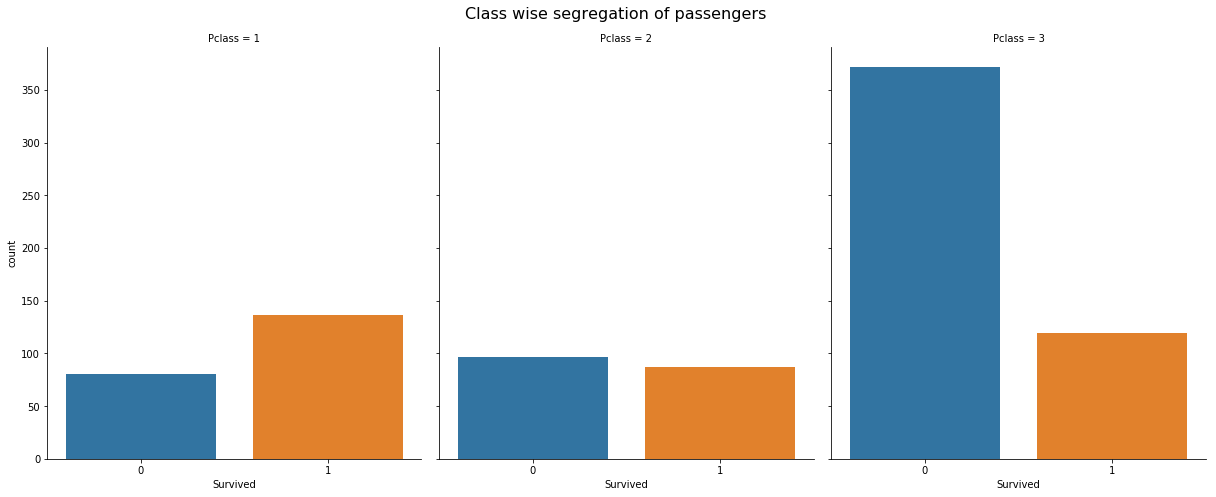

In [48]:
sns.catplot('Survived', col='Pclass', data=titanic_cleaned, kind='count', height=7, aspect=.8)
plt.subplots_adjust(top=0.9)
plt.suptitle('Class wise segregation of passengers', fontsize=16)

Text(0.5, 0.98, 'Class and gender wise segregation of passengers')

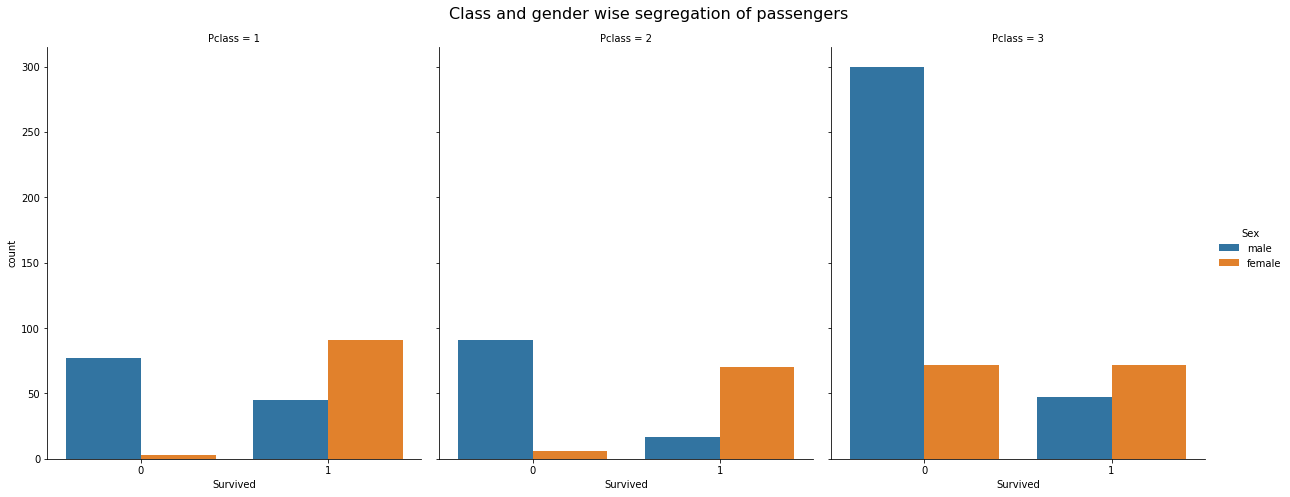

In [49]:
sns.catplot('Survived', col='Pclass', hue='Sex', data=titanic_cleaned, kind='count', height=7, aspect=.8)
plt.subplots_adjust(top=0.9)
plt.suptitle('Class and gender wise segregation of passengers', fontsize=16)

Survival rate across all the class using pandas groupby function

In [44]:
titanic_cleaned.groupby(['Pclass'])['Survived'].sum()/titanic_cleaned.groupby(['Pclass'])['Survived'].count()*100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

Hence, Class played an important role in survival of the passengers.

#### To analyse the corelation between Survival and passengers having Siblings and/or Spouses aboard

In [48]:
survivors = titanic_df.groupby('Survived')['SibSp']
survivors.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,0.553734,1.288399,0.0,0.0,0.0,1.0,8.0
1,342.0,0.473684,0.708688,0.0,0.0,0.0,1.0,4.0


Text(0.5, 1.0, 'Comparison of survivors v/s non survivors based on siblings and spouses aboard')

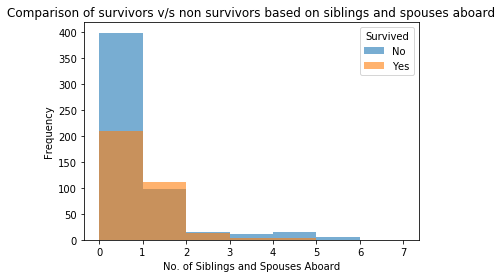

In [49]:
ax1, ax2 = survivors.plot(kind='hist', bins=range(0, 8, 1), legend=True, alpha=0.6)
ax1.set_xlabel('No. of Siblings and Spouses Aboard')
ax1.legend(['No', 'Yes'], title='Survived', loc='upper right')
plt.title('Comparison of survivors v/s non survivors based on siblings and spouses aboard')

The above histogram shows that having siblings and spouses aboard is not a factor determining survival of a passenger.

#### To analyse the corelation between Survival and passengers having Parents and/or Children aboard

In [51]:
survivors = titanic_df.groupby('Survived')['Parch']
survivors.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,0.329690,0.823166,0.0,0.0,0.0,0.0,6.0
1,342.0,0.464912,0.771712,0.0,0.0,0.0,1.0,5.0


Text(0.5, 1.0, 'Comparison of survivors v/s non survivors based on parents and children aboard')

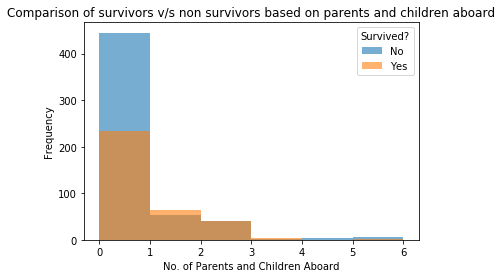

In [52]:
ax1, ax2 = survivors.plot(kind='hist', legend=True, bins=range(0, 7, 1), alpha=0.6)
ax1.set_xlabel('No. of Parents and Children Aboard')
ax1.legend(['No', 'Yes'], title='Survived?', loc='upper right')
plt.title('Comparison of survivors v/s non survivors based on parents and children aboard')

The above histogram shows that having parents and children aboard is not a factor determining survival of a passenger.

#### To find how fare is related to Age, Class and Port of Embarkation and how Embarkation varied across different ports

Text(0.5, 1.0, 'Scatterplot of passengers w.r.t Fare and Age')

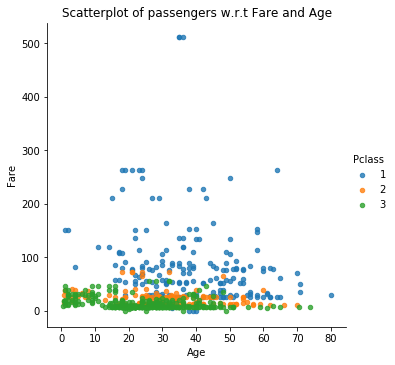

In [51]:
sns.lmplot('Age', 'Fare', data=titanic_cleaned, fit_reg=False, hue="Pclass", scatter_kws={"marker": ".", "s": 20})
plt.title('Scatterplot of passengers w.r.t Fare and Age')

Text(0.5, 0.98, 'Scatterplot of passengers w.r.t Fare and Age for diff. ports')

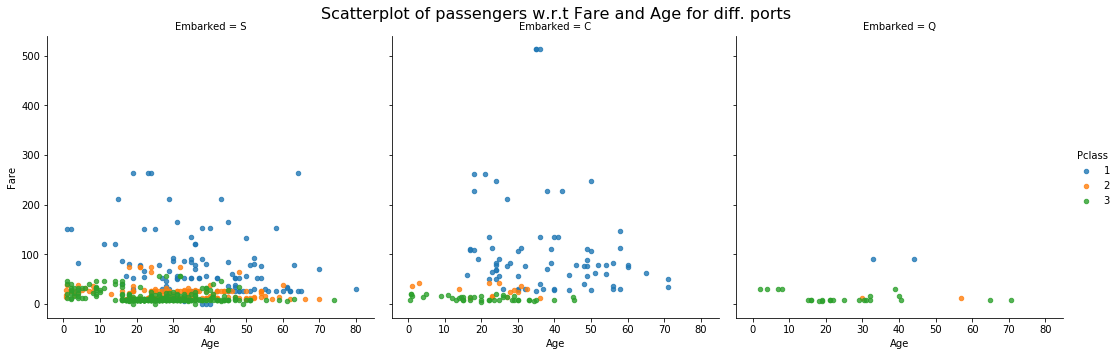

In [52]:
sns.lmplot('Age', 'Fare', data=titanic_cleaned, fit_reg=False, hue="Pclass", col="Embarked", scatter_kws={"marker": ".", "s": 20})
plt.subplots_adjust(top=0.9)
plt.suptitle('Scatterplot of passengers w.r.t Fare and Age for diff. ports', fontsize=16)

It is observered that Fare is uniform for Class 2 and 3 across all ages. Fare varies for Class 1 across all ages. Also, lot of passengers embarked from port of Southampton.

## Conclusions


It is concluded that women had higher chances of survival than men.The Class of the passengers had played an important role in their survival.There was no role of parent-child or spouse/sibling relationship in a passenger's survival. Also Fare varied a lot for Class 1 passengers due to unknown reasons.

